Customer segmentation helps businesses group customers based on similar behaviors or characteristics, allowing for more targeted marketing. 

K-means clustering is an unsupervised machine learning algorithm that partitions data into distinct clusters based on feature similarity. Each cluster represents a group of customers with similar traits, such as purchasing behavior or demographics.

The process involves:

1) Data Preparation: Clean and preprocess customer data.

2) Choosing k: Determine the optimal number of clusters.

3) Clustering: Apply the k-means algorithm to group customers.

4) Analysis: Examine each cluster for insights into customer behavior.

5) Actionable Insights: Develop targeted marketing strategies for each segment.

In [ ]:
import pandas as pd # import the pandas library as 'pd' to handle and manipulate structured data efficiently
import numpy as np # import the numpy library as 'np' to perform numerical and array-based computations

from sklearn.cluster import KMeans # import the KMeans class from sklearn's clustering module to perform K-Means clustering

from sklearn.metrics import silhouette_score # import silhouette_score function from sklearn.metrics to measure how well data points fit within their assigned clusters versus others

import matplotlib.pyplot as plt # import the pyplot module from matplotlib as 'plt' to create and customize visual plots

In [3]:
# create a dataframe from the csv file and show it's first 5 rows
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


As we see, the columns in the dataframe are as follows:

CustomerID – a unique identifier assigned to each customer; used only for reference, not for analysis.

Gender – indicates whether the customer is Male or Female (later encoded as 1 or 0).

Age – the customer’s age in years; helps in understanding age-based spending behavior.

Annual Income (k$) – the customer’s yearly income measured in thousands of dollars; shows purchasing power.

Spending Score (1-100) – a rating (1 = very low, 100 = very high) representing how much the customer tends to spend, usually based on their behavior and purchasing patterns.

However, this dataset is not ready for the model to be trained on. It needs to be preprocessed and cleaned first.

In [ ]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0}) # convert the categorical 'Gender' column into numeric values where Male = 1 and Female = 0 since machine learning models can only work with numerical data
df.drop(columns=['CustomerID'], axis=1, inplace=True) # remove the 'CustomerID' column permanently from the dataframe as it is an identifier and not useful for analysis
df.head() # display the first five rows of the dataframe to verify applied transformations

Now that we have shaped the data into the correct format, we can train the model.

Before using k-means method, it is generally recommended to determine the optimal number of clusters. This can be done using the elbow method.

The elbow method works by plotting the within-cluster sum of squares (WCSS) against the number of clusters. The WCSS is the sum of the squared distances between each point and its centroid. 

The optimal number of clusters is the one where the WCSS begins to level off ie it starts to decrease more slowly, thus forming an elbow shape.

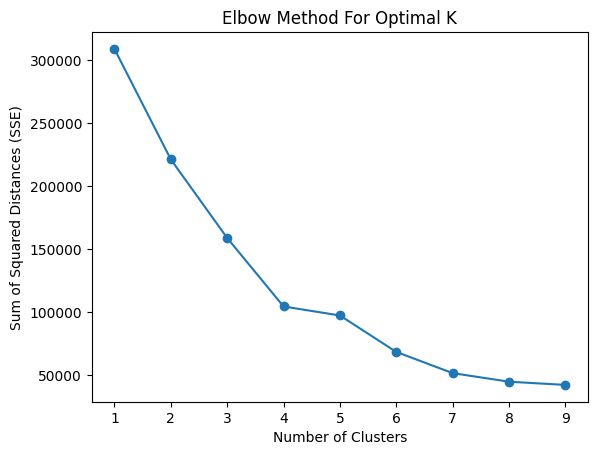

In [ ]:
sse = [] # initialize an empty list to store the sum of squared errors (SSE) for each cluster count
k_range = range(1,10) # define the range of possible cluster numbers (k) to test from 1 to 9

for k in k_range: # iterate over each value of k in the defined range
    kmeans = KMeans(n_clusters=k, random_state=42) # create a KMeans model with k clusters and a fixed random state for reproducibility
    kmeans.fit(df) # fit the KMeans algorithm to the dataframe to perform clustering
    sse.append(kmeans.inertia_) # append the computed SSE (inertia) for this k value to the list

plt.plot(k_range, sse, marker='o') # plot the number of clusters (k) against their respective SSE values using circle markers
plt.xlabel('Number of Clusters') # label the x-axis to indicate cluster count
plt.ylabel('Sum of Squared Distances (SSE)') # label the y-axis to show the total within-cluster variance
plt.title('Elbow Method For Optimal K') # add a title to the plot describing the method used
plt.show() # display the plotted elbow curve to visually determine the optimal number of clusters

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42) # create a KMeans model to divide the dataset into 3 clusters with fixed randomness for consistent results
df['cluster'] = kmeans.fit_predict(df) # apply the KMeans model to the dataframe, fit it, and assign each record a cluster label which is stored in a new column 'cluster'

In [9]:
cluster_labels = { # define a dictionary to map each cluster label to a meaningful customer segment name
    0: "Low Income - Low Spending", # label for cluster 0 indicating customers with both low income and low spending habits
    1: "High Income - High Spending", # label for cluster 1 representing customers with both high income and high spending behavior
    2: "Young Low Income - High Spending" # label for cluster 2 denoting younger customers with low income but high spending
}

df['Segment'] = df['cluster'].map(cluster_labels) # create a new column 'Segment' by mapping numeric cluster labels to descriptive names using the defined dictionary
print(df) # display the updated dataframe to review assigned segment names for each record

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  cluster  \
0         1   19                  15                      39        2   
1         1   21                  15                      81        2   
2         0   20                  16                       6        0   
3         0   23                  16                      77        2   
4         0   31                  17                      40        2   
..      ...  ...                 ...                     ...      ...   
195       0   35                 120                      79        1   
196       0   45                 126                      28        1   
197       1   32                 126                      74        1   
198       1   32                 137                      18        1   
199       1   30                 137                      83        1   

                              Segment  
0    Young Low Income - High Spending  
1    Young Low Income - High Spending  
2  

Now let's visualize the clusters.

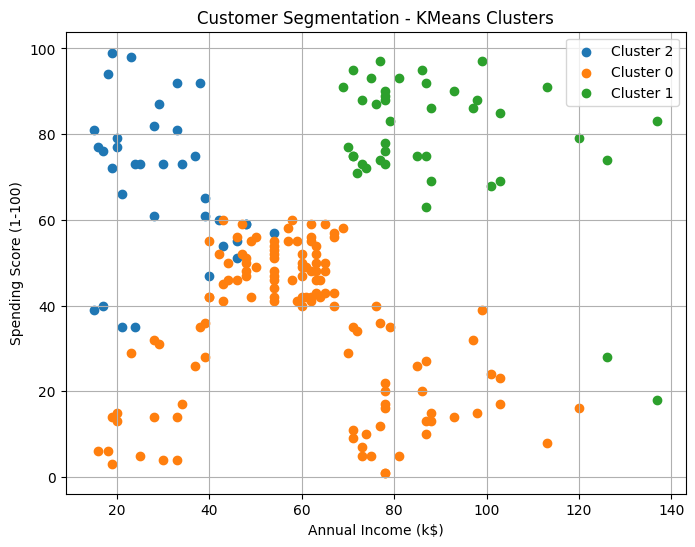

In [10]:
plt.figure(figsize=(8, 6)) # create a new figure with dimensions 8x6 inches to define the plot size

for cluster in df['cluster'].unique(): # iterate through each unique cluster label in the dataframe
    clustered = df[df['cluster'] == cluster] # filter rows belonging to the current cluster
    plt.scatter(clustered['Annual Income (k$)'], clustered['Spending Score (1-100)'], label=f'Cluster {cluster}') # plot the income vs spending score for this cluster with a unique label

plt.xlabel('Annual Income (k$)') # label the x-axis to indicate customers’ annual income
plt.ylabel('Spending Score (1-100)') # label the y-axis to show customers’ spending score
plt.title('Customer Segmentation - KMeans Clusters') # set the plot title to describe the visualization
plt.legend() # display a legend to identify clusters by their color
plt.grid(True) # enable grid lines for better visual clarity
plt.show() # render and display the final scatter plot showing customer clusters

Now let's evaluate the model using silhouette score.

In [11]:
features = df[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']] # select the main numerical features from the dataframe used for clustering analysis

silhouette_avg = silhouette_score(features, df['cluster']) # calculate the silhouette score to evaluate how well each data point fits its assigned cluster compared to others

print(f'Silhouette Score: {silhouette_avg:.2f}') # print the average silhouette score rounded to two decimals to assess overall clustering quality

Silhouette Score: 0.34


Finally we can save the model to be used in the app. We will do this using pickle module.

In [12]:
import pickle # import the pickle module to serialize and save Python objects to disk

pickle.dump(kmeans, open("kmeans.pkl", 'wb')) # serialize the trained KMeans model and save it as a binary file named 'kmeans.pkl' for later reuse without retraining